### Please Note : Google Colab has been used for model training

---------------------------------------------------------------------


## Contents

1. **Import Required Libraries**


2.   **Data Reading/Data Understanding** 
Dataset Creation → Create train & validation dataset from the train directory with a batch size of 32. 


3. **Dataset visualisation →** Create a code to visualize one instance of all the nine classes present in the dataset 


4. **Model Building & training**


5. **Data Augmentation** strategy to resolve underfitting/overfitting 


6. **Model Building & training on the augmented data.**


7. **Class distribution:** Examine the current class distribution in the training dataset 

     **Handling class imbalances:** Rectify class imbalances present in the     training dataset with Augmentor library.



8. **Model Building & training on the rectified class imbalance data**



-------------------------------------------------------------------------
-------------------------------------------------------------------------



## 1. Import Libraries required

In [68]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout

## 2. Read Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! ls /content/drive/MyDrive

'12 (1).pdf'
 12.pdf
'airtel: Prepaid | Postpaid | Broadband | 4G | DTH Services in India.pdf'
'Bank statement (July 2020-Jan 2021).pdf'
 Btech.gradereport.pdf
 CNN_DATA_
'Colab Notebooks'
 EDA_Case_Study_application_data.csv.final.ipynb
 EDA_Case_Study_application_data.csv.ipynb
 EDA.ipynb
'Getting started.pdf'
'IIITB_Upgrad_docs (1).zip'
'IIITB_Upgrad_docs (2).zip'
'IIITB_Upgrad_docs (3).zip'
'IIITB_Upgrad_docs (4).zip'
 IIITB_Upgrad_docs.zip
 IMG_20170310_0012.jpg
 Kaggle
 Live_Session_ML_Clustering_Assignment.gdoc
 ML_Live_Session_Tree_Models.gdoc
 pan.jpg
 PAN.pdf
'PASSPORT PIC.jpg'
'Untitled form.gform'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet (2).gsheet'
'Untitled spreadsheet.gsheet'
 UPGRAD.zip


In [5]:
os.chdir('/content/drive/MyDrive/CNN_Data_Set')

In [6]:
!ls

CNN_assignment.zip


In [7]:
!unzip CNN_assignment.zip

Archive:  CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The I

In [8]:
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

We load these images off disk using the helpful image_dataset_from_directory utility.

### 2.1 Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

We will divide the training  dataset into  2 parts :

**Training : 80% of the images** 

**Validation :  20% of the images**

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed= seed,
  label_mode = 'int',
  class_names= None,
  color_mode= 'rgb',
  shuffle = True,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size = batch_size,
  crop_to_aspect_ratio = False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### 2.2 Find total files (Training and validation)

In [13]:
## Note : We have used seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory

## Also, made sure images were resized to the size img_height*img_width, while writting the dataset.

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed= seed,
  label_mode = 'int',
  class_names= None,
  color_mode= 'rgb',
  shuffle = True,
  validation_split = 0.2,
  subset = 'validation',
  image_size = (img_height, img_width),
  batch_size = batch_size,
  crop_to_aspect_ratio = False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# Listed out all the classes of skin cancer and store them in a list (in alphabetical order). 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 3. Visualize Data

**Note  :** The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

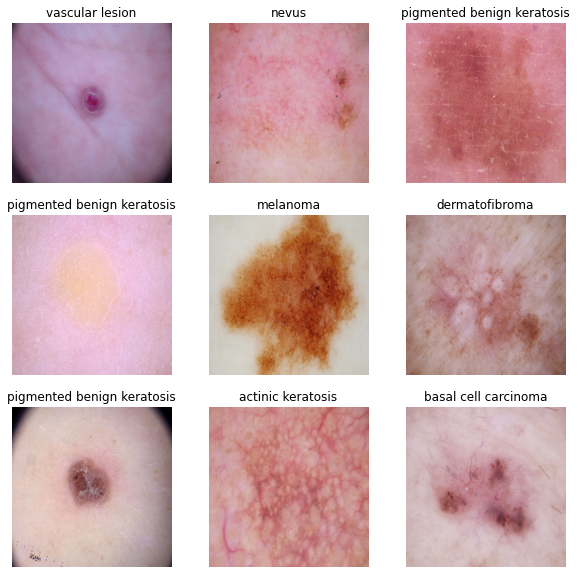

In [15]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

### Configure Dataset for Performance

We made sure to use buffered prefetching so that we can yield data without having I/O blocking. 

The following two methods were used to load data :

**Dataset.cache()** - keeps the images in memory after they're loaded off disk during the first epoch.

**Dataset.prefetch()** - overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model Building and Training

Now we will create a CNN model, which can accurately detect 9 classes present in the dataset. 

**Note :**  The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Hence, we will **standardize values to be in the [0, 1]**

We use **layers.experimental.preprocessing.Rescaling** to normalize pixel values between (0,1).



### 4.1 Create Model

**NOTE :**  The Keras Library allows us to use different activation function for each layer. 

Here we have applied **ReLU for the hidden layers and softmax for the output layer**

> **Please note :** **ReLU** is considered as the best activation function for deep learning by most researchers. The output layer is also compatible to use relu as activation function.  However, when we tried training the model using ReLU in output, the results were **better in case of Softmax**.

*Hence considering Softmax activation for the output layer*

In [17]:
classes = 9
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#1st Convolution Block : consists of 2 convolution layers & 1 Pooling layer
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd  Convolution Block : consists of 2 convolution layers & 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening layer
model.add(Flatten())
model.add(Dense(512, activation ='relu'))

# Softmax Layer (Output)
model.add(Dense(classes, activation='softmax'))


### 4.2 Compile the model

Choose an appropirate optimiser and loss function for model training 

> optimizer used - **adam**

> loss function - **SparseCategoricalCrossentropy**

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        36928     
                                                        

### 4.3 Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 301s 5s/step - loss: 2.2303 - accuracy: 0.1931 - val_loss: 2.0176 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 290s 5s/step - loss: 1.7881 - accuracy: 0.3382 - val_loss: 1.6552 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 284s 5s/step - loss: 1.5043 - accuracy: 0.4794 - val_loss: 1.6159 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 280s 5s/step - loss: 1.4336 - accuracy: 0.5100 - val_loss: 1.7515 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 283s 5s/step - loss: 1.3130 - accuracy: 0.5346 - val_loss: 1.4598 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 283s 5s/step - loss: 1.1599 - accuracy: 0.5882 - val_loss: 1.4544 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 287s 5s/step - loss: 1.0516 - accuracy: 0.6311 - val_loss: 1.4963 - val_accuracy: 0.5481
Epoch 8/20
56/56 [======

### 4.4 Visualizing training results

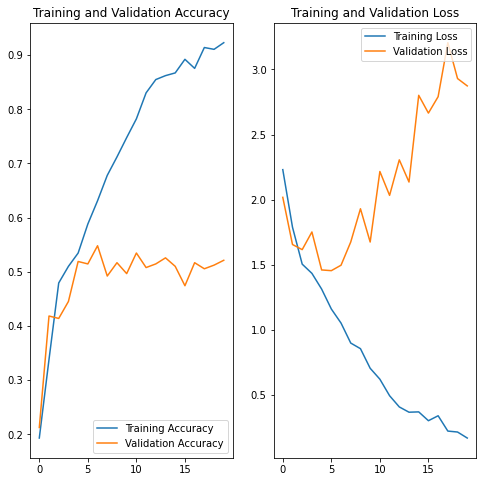

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

> 1. We can clearly spot overfitting here. The training accuracy is far higher than validation accuracy.

> 2. One of the resons behind this could be a smaller training dataset, due to which out model has also learnt the noise present in it.

**We will rectify this using Augmentor to add more real images to our dataset to increase it's size**

## 5. Data Augmentation (to resolve overfitting/underfitting)

Overfitting generally occurs when there are a small number of training examples. 

**Data augmentation** takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [22]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

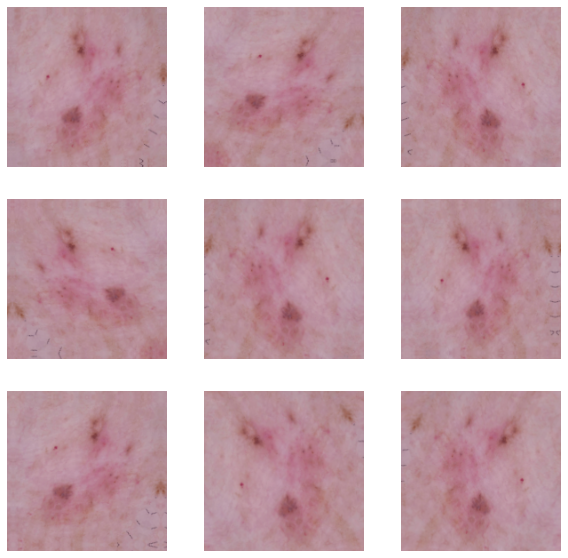

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):  
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

## 6. Model Re-build (on augmented data)

### 6.1 Build Model

In [24]:
#dropouts included here to deal with overfitting

model= Sequential()
model.add(data_augmentation)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))


#1st Convolution Block : consists of 2 convolution layers & 1 Pooling layer
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


# 2nd  Convolution Block : consists of 2 convolution layers & 1 Pooling layer
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


# Flattening layer
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(layers.Dropout(0.4))


# softmax layer
model.add(Dense(9, activation='softmax'))

### 6.2 Compliling the model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                      

### 6.3 Train model

 We use 20 epochs to train our model

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 300s 5s/step - loss: 3.0151 - accuracy: 0.1908 - val_loss: 2.1356 - val_accuracy: 0.1834
Epoch 2/20
56/56 [==============================] - 297s 5s/step - loss: 2.0494 - accuracy: 0.2070 - val_loss: 1.9895 - val_accuracy: 0.2483
Epoch 3/20
56/56 [==============================] - 299s 5s/step - loss: 1.9083 - accuracy: 0.2718 - val_loss: 1.8478 - val_accuracy: 0.3087
Epoch 4/20
56/56 [==============================] - 297s 5s/step - loss: 1.8449 - accuracy: 0.3086 - val_loss: 1.7314 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 297s 5s/step - loss: 1.8083 - accuracy: 0.3398 - val_loss: 1.6889 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 297s 5s/step - loss: 1.6781 - accuracy: 0.3850 - val_loss: 1.6015 - val_accuracy: 0.4295
Epoch 7/20
56/56 [==============================] - 297s 5s/step - loss: 1.6760 - accuracy: 0.3968 - val_loss: 1.7092 - val_accuracy: 0.3602
Epoch 8/20
56/56 [======

### 6.3 Visualizing the results

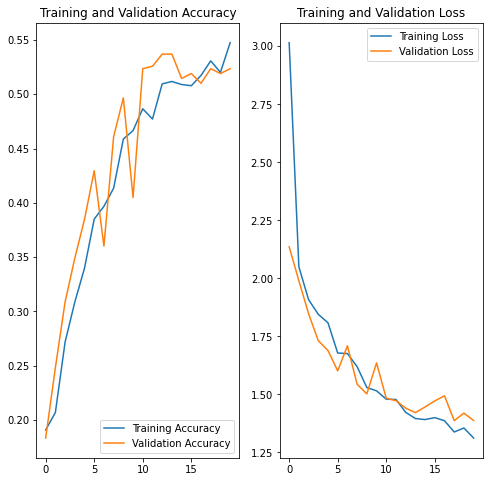

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings

> 1. Clearly we have now **rectified the overfitting issue** ==> there is a similar accuracy across the training and validation data. Augmentation layer and dropout helped us achieve this.

> 2. However as the accuracy is still at a lower side, there is **scope for improvement** as the **model is now underfitting.**

> 3. Training accuracy = 0.54

> 4. Validation accuracy = 0.52

## 7. Handle Class Imbalance



**Note :** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 

**Class imbalance can have a detrimental effect on the final model quality.**

Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

 ### 7.1 Analyze dataset

In [28]:
from glob import glob
path_list = [p for p in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(q)) for q in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [29]:
dataframe_dict = dict(zip(path_list, lesion_list))
orig_df = pd.DataFrame(list(dataframe_dict.items()), columns=['Path', 'Label'])
orig_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


 ### 7.2 Find the distribution of classes in the training dataset.

Class = 0, n=114 (5.092%)
Class = 1, n=376 (16.793%)
Class = 2, n=95 (4.243%)
Class = 3, n=438 (19.562%)
Class = 4, n=357 (15.945%)
Class = 5, n=462 (20.634%)
Class = 6, n=77 (3.439%)
Class = 7, n=181 (8.084%)
Class = 8, n=139 (6.208%)


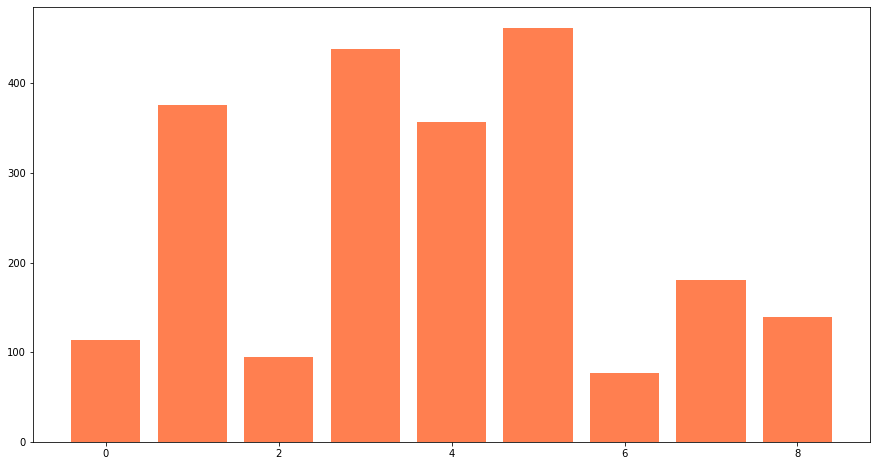

In [61]:
from sklearn.preprocessing import LabelEncoder

from collections import Counter

#we split data into Input and Output components
X, y = orig_df['Path'], orig_df['Label']

#we now apply Label encoder to the target variable
y = LabelEncoder().fit_transform(y)
counter = Counter(y)

for key, val in counter.items():
  perc = val/len(y)*100
  print ('Class = %d, n=%d (%.3f%%)' % (key, val, perc))
#plot distribution of all classes
plt.figure(figsize= (15,8))
plt.bar(counter.keys(), counter.values(), color = 'coral')
plt.show()

#### Analyze distribution of each class (label wise)

In [66]:
distribution = [0]*9
for _, labels_batch in train_ds :
  labels_arr = labels_batch.numpy()
  for label in labels_arr:
    distribution[label] = distribution[label] + 1
print(distribution)


pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

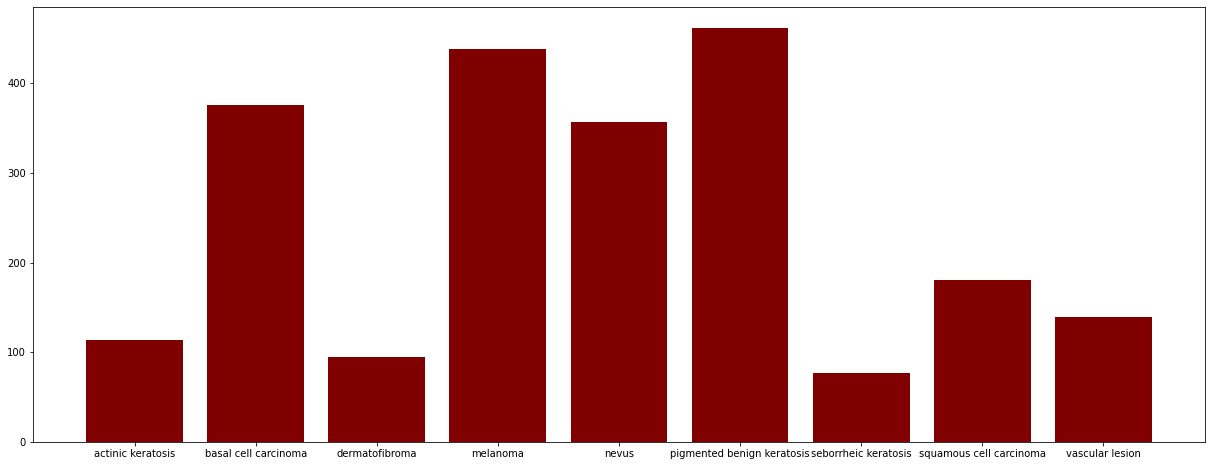

In [64]:
plt.figure(figsize= (21,8))
ax = plt.bar(class_names, distribution, color='maroon')
plt.show()

### We can see a clar presence of Class Dominance here 

As visible from the above plot, there is a visible dominance of some classes

> **seborrheic keratosis** has least number of sample (77)

 > **Pigmented benign keratosis** has the maximum samples (462) followed by **melanoma** (438)

### 7.3 Rectify Class Imbalance (using augmentor library)

 We will use a Python package known as **Augmentor** to add more samples across all classes in order to ensure that none of the classes have very few samples.

In [35]:
!pip install Augmentor

**To use Augmentor, the following general procedure is followed:**

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2. Define a number of operations to perform on this data set using your Pipeline object.

3. Execute these operations by calling the Pipeline’s sample() method.

In [36]:
path_to_dir_train = "Skin cancer ISIC The International Skin Imaging Collaboration/Train"

import Augmentor
for c in class_names :
  data_directory = os.path.join(path_to_dir_train, c)
  print(data_directory)

  p = Augmentor.Pipeline(data_directory)
  p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500)

  # We add 500 samples per class to ensure that none of the classes are sparse


Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE6686E78D0>: 100%|██████████| 500/500 [00:22<00:00, 22.07 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE667DC0FD0>: 100%|██████████| 500/500 [00:26<00:00, 18.81 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE6690282D0>: 100%|██████████| 500/500 [00:22<00:00, 22.03 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE667E4C690>: 100%|██████████| 500/500 [01:37<00:00,  5.14 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE667DF4AD0>: 100%|██████████| 500/500 [01:44<00:00,  4.77 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE669017750>: 100%|██████████| 500/500 [00:23<00:00, 21.34 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE667E0EE90>: 100%|██████████| 500/500 [00:50<00:00,  9.84 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE667DC0710>: 100%|██████████| 500/500 [00:23<00:00, 21.48 Samples/s]


Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE667E60750>: 100%|██████████| 500/500 [00:22<00:00, 22.04 Samples/s]


**Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.**

 Lets take a look at total count of augmented images.

In [37]:
# count number of images under each class post addition

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


We have **succesfully added 500 images to each class** in order to achive class balance

Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
path_new_list = [g for g in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_new_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_fc941bda-94e5-49c0-84c6-2f9d44fc67da.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_f2f2210d-a7ec-4e5b-b04f-ba0196db5fc7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033811.jpg_6aad4595-8521-46f5-8280-f3286c43207f.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028370.jpg_a68bd30c-4be5-4d8a-8005-24aa7afa077a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028076.jpg_e6dab856-e122-4dda-a74b-3b7f88ccffc5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ou

In [39]:
lesion_new_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_new_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [40]:
dataframe_new_dict = dict(zip(path_new_list, lesion_new_list))

In [41]:
df2 = pd.DataFrame(list(dataframe_new_dict.items()), columns = ['Path', 'Label'])
df_new = orig_df.append(df2)

In [42]:
df_new['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have **added 500 images to all the classes to maintain class balance.** We can also add more images as we want to improve training process.


*Let's check if this helped balancing the overall dataset*

## 8. Re-build Model on Balanced Dataset

In [52]:
# Train the model on the data created using Augmentor

batch_size = 32
img_height = 180
img_width = 180

### 8.1 Create a training dataset

In [53]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed= seed,
  label_mode = 'int',
  class_names= None,
  color_mode= 'rgb',
  shuffle = True,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size = batch_size,
  interpolation='bilinear',
  follow_links=False,
  crop_to_aspect_ratio = False)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### 8.2 Create a validation dataset

In [54]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed= seed,
  label_mode = 'int',
  class_names= None,
  color_mode= 'rgb',
  shuffle = True,
  validation_split = 0.2,
  subset = 'validation',
  image_size = (img_height, img_width),
  batch_size = batch_size,
  interpolation='bilinear',
  follow_links=False,
  crop_to_aspect_ratio = False)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### 8.3 Model creation (including normalization)

> **Note :** We will rescale the images to ensure the pixel values are normalized to (0,1)

Also, we have used **ReLU activation for hidden layers** and **Softmax for output layer**

In [55]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
                   
                    #1st Convolution Block : consists of 1 convolution layer & 1 Pooling layer
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),

                    # 2nd  Convolution Block : consists of 1 convolution layer & 1 Pooling layer
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),

                    # 3rd  Convolution Block : consists of 1 convolution layer & 1 Pooling layer
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),

                    layers.Flatten(),

                    # Softmax Layer (Output)
                    layers.Dense(128, activation='softmax'),
                    layers.Dense(classes)
])




### 8.4 Model compilation 

Optimizer used : **adam**

Loss function used : **SparseCategoricalCrossentropy**

In [57]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()

### 8.5 Training the model (20 epochs)

In [58]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 205s 984ms/step - loss: 1.9689 - accuracy: 0.2561 - val_loss: 1.5759 - val_accuracy: 0.4417
Epoch 2/20
169/169 [==============================] - 158s 935ms/step - loss: 1.4697 - accuracy: 0.4366 - val_loss: 1.5016 - val_accuracy: 0.4439
Epoch 3/20
169/169 [==============================] - 158s 938ms/step - loss: 1.3003 - accuracy: 0.5230 - val_loss: 1.2352 - val_accuracy: 0.5501
Epoch 4/20
169/169 [==============================] - 158s 936ms/step - loss: 1.0747 - accuracy: 0.5977 - val_loss: 1.0807 - val_accuracy: 0.5909
Epoch 5/20
169/169 [==============================] - 159s 940ms/step - loss: 0.9454 - accuracy: 0.6582 - val_loss: 0.9681 - val_accuracy: 0.6370
Epoch 6/20
169/169 [==============================] - 158s 936ms/step - loss: 0.7675 - accuracy: 0.7157 - val_loss: 0.8853 - val_accuracy: 0.6845
Epoch 7/20
169/169 [==============================] - 158s 933ms/step - loss: 0.6683 - accuracy: 0.7591 - val_loss: 0.8862 -

### 8.6 Visualize Results

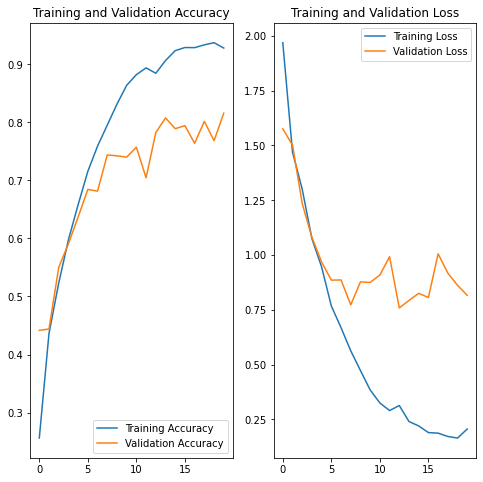

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

> **Finally our model is neither underfitting nor overfitting**

> **Issues rectified :** Class Imbalance *(which led to underfitting)* and Overfitting *(caused by insufficient amount of training data)*

> **Augmentor library** helped us rectify the class imbalance and overfitiing issue. Our validation accuracy has increased by multiple folds.

 > **Training accuracy** now : **92%**

 > **Validation accuracy** now : **81%**

 > Training Loss : 0.20

 > Validation Loss : 0.81

----------------------------------------------------------------------------------------------------------------------------------------------------------------